In [1]:
from functions import *
import tensorflow as tf
tf.config.run_functions_eagerly(True)
epochs=20
batch_size=1
data_dir = "E:\\taha\\code\\Real-Time-Violence-Detection-in-Video-\\fight-detection-surv-dataset-master\\"
model_weight='tahaWeights.h5'
# train_video_model(data_directory)

In [2]:
# tf = # Add your TensorFlow import here
model = videoFightModel(tf, is_train=False)
print(model.summary())


model loaded from: tahaWeights.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 12800)        20024384  
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 30, 30)            1539720   
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 90)           2790      
 tributed)                                                       
                                                                 
 dropout (Dropout)           (None, 30, 90)            0         
                                                                 
 global_average_pooling1d (G  (None, 90)               0         
 lobalAveragePooling1D)                                          
                    

c:\Users\siedt\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [3]:

# X, y = load_dataset(data_dir)
X = np.load("X.npy")
y = np.load("y.npy")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# np.save("X.npy",X)
# np.save("y.npy",y)

X shape: (474, 30, 160, 160, 3)
y shape: (474,)


In [4]:
# np.savez("X.npz",X)
# np.savez("y.npz",y)

In [4]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Data normalization
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# np.save("xtest.npy",X_test)
# np.save("ytest.npy",y_test)



X_train shape: (331, 30, 160, 160, 3)
y_train shape: (331,)
X_test shape: (143, 30, 160, 160, 3)
y_test shape: (143,)


In [6]:
np.save("X_test.npy",X_test)
np.save("y_test.npy",y_test)
# del X_test
# del y_test

In [5]:
del X
del y 

In [6]:
# Split the dataset into training and validatin sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=40)

print(f"X_train shape: {X_train2.shape}")
print(f"y_train shape: {y_train2.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# np.save("xtrain.npy",X_train2)
# np.save("ytrain.npy",y_train2)
# np.save("xval.npy",X_val)
# np.save("yval.npy",y_val)


X_train shape: (297, 30, 160, 160, 3)
y_train shape: (297,)
X_val shape: (34, 30, 160, 160, 3)
y_val shape: (34,)


In [7]:
del X_train
del y_train
del X_val

In [8]:
y_train2 = tf.one_hot(y_train2, depth=2)
print(f'y_train shape: {y_train2.shape}')
y_val = tf.one_hot(y_val, depth=2)
print(f'y_val shape: {y_val.shape}')
y_test = tf.one_hot(y_test, depth=2)
print(f'y_test shape: {y_test.shape}')

y_train shape: (297, 2)
y_val shape: (34, 2)
y_test shape: (143, 2)


In [11]:

for i in range(2):
    # Model training
    history = model.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=1, batch_size=6)
    print(f"Training accuracy: {history.history['accuracy'][-1]}")
    print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

    # Save the trained weights
    model.save_weights(model_weight)
    print(f"Saved model weights to {model_weight}")



C:\Users\siedt\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


50/50 [==============================] - 4347s 87s/step - loss: 0.2545 - accuracy: 0.8990 - val_loss: 0.0988 - val_accuracy: 0.9412
Training accuracy: 0.8989899158477783
Validation accuracy: 0.9411764740943909
Saved model weights to tahaWeights.h5
50/50 [==============================] - 4295s 85s/step - loss: 0.1602 - accuracy: 0.9495 - val_loss: 0.0837 - val_accuracy: 0.9706
Training accuracy: 0.9494949579238892
Validation accuracy: 0.970588207244873
Saved model weights to tahaWeights.h5


In [9]:
del X_train2


In [10]:
test_model(model, X_test, y_test)

Testing the model...


C:\Users\siedt\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


36/36 [==============================] - 819s 23s/step - loss: 0.5703 - accuracy: 0.8112
Test loss: 0.5703245401382446
Test accuracy: 0.811188817024231


In [ ]:

# Save the trained weights
model.save_weights(model_weight)
print(f"Saved model weights to {model_weight}")


Saved model weights to tahaWeights.h5


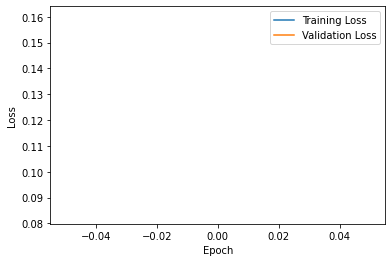

In [12]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, "model-image.png")

AttributeError: module 'pydot' has no attribute 'InvocationException'